# Machine Learning - Presentation - Team 6

### Team Members - 
##### (1) Ganesh Vasant Kini Kulai
##### (2) Abhishek Kumar Singh
##### (3) Dinu Thomas
##### (4) Charithra Chandrashekar

### Topic - Prediction of bike rental service in a large metropolitan city

![Image](https://www.icebike.org/wp-content/uploads/2015/08/bike-rental-shop-14716686.jpg)

### Importing The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import optimize
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression


# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

import datetime

# 1 Exploratory Data Analysis

In [2]:
bikeData = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')

In [3]:
bikeData.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
bikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bikeData.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30-11-2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30-11-2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30-11-2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30-11-2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30-11-2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
bikeData.describe(include='object')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,11-11-2018,Summer,No Holiday,Yes
freq,24,2208,8328,8465


In [7]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
bikeData['Hour'].describe()

count    8760.000000
mean       11.500000
std         6.922582
min         0.000000
25%         5.750000
50%        11.500000
75%        17.250000
max        23.000000
Name: Hour, dtype: float64

In [9]:
bikeData.shape

(8760, 14)

<a id="outliers"></a>
## 1.1 Outlier Analysis and Treatment

**Checking the outliers in all the variables and treat them using appropriate techniques.**

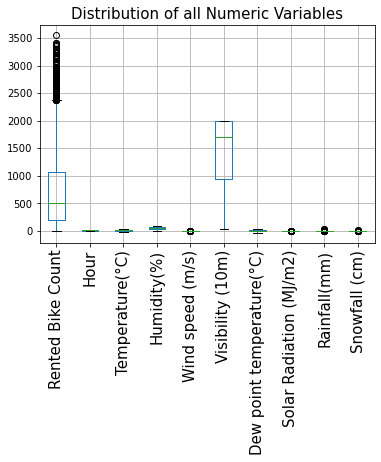

In [10]:
# plot a boxplot to visualize the outliers in all the numeric variables
bikeData.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
# set text size using 'fontsize'
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variable 'Rented Bike Count' has a quite large range as compared to the other variables.**

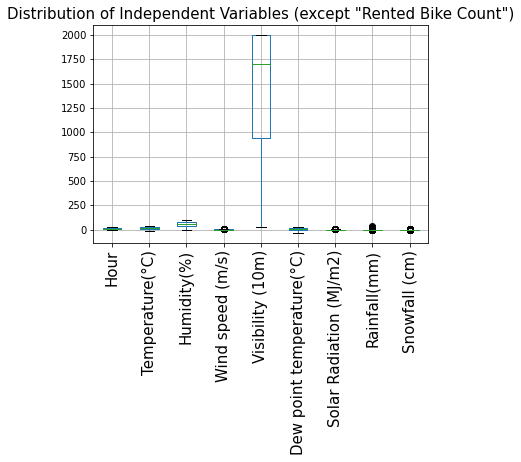

In [11]:
# plot boxplots of all the numeric variables except 'Rented Bike Count' 
# use 'iloc[]' to select the variables except 'Rented Bike Count' 
bikeData.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13]].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables (except "Rented Bike Count")', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Plot the boxplot of an dependent variable 'Rented Bike Count'.**

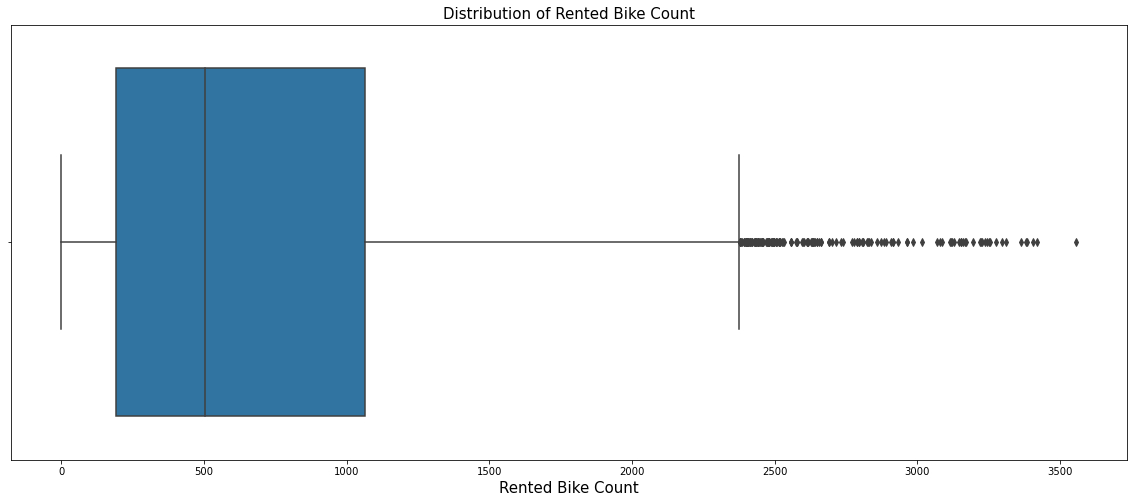

In [12]:
plt.figure(figsize=(20,8))
# plot boxplot for 'Rented Bike Count' using seaborn library
sns.boxplot(bikeData['Rented Bike Count'])

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Rented Bike Count', fontsize = 15)
plt.xlabel('Rented Bike Count', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above plots, we notice that the variable Rented Bike Count has points above the upper extreme - these points are outliers in the data. 



In [13]:
#Let us use the IQR method to remove the outliers.

In [14]:
# calculate the first quartile
#Q1 = bikeData.quantile(0.25)

# calculate the third quartile
#Q3 = bikeData.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
#IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (the rows represent outliers in the data)
#bikeData = bikeData[~((bikeData < (Q1 - 1.5 * IQR)) | (bikeData > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
#bikeData.shape

In [15]:
#**Interpretation:** A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. From the above output, we can see that the dimensions are reduced that implies outliers are removed.

<a id="null"></a>
## 1.2  Missing Value Analysis and Treatment

**Checking the presence of missing values in the data and treat them.**

In [16]:
# sorting the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = bikeData.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (bikeData.isnull().sum()*100/bikeData.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Functioning Day,0,0.0
Holiday,0,0.0
Seasons,0,0.0
Snowfall (cm),0,0.0
Rainfall(mm),0,0.0
Solar Radiation (MJ/m2),0,0.0
Dew point temperature(°C),0,0.0
Visibility (10m),0,0.0
Wind speed (m/s),0,0.0
Humidity(%),0,0.0


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="std"></a>
## 1.3 Remove Variables with Low Standard Deviation

#### Check the standard deviation of all the variables

In [17]:
# std() returns the standard deviation of each variable 
bikeData.std()

Rented Bike Count            644.997468
Hour                           6.922582
Temperature(°C)               11.944825
Humidity(%)                   20.362413
Wind speed (m/s)               1.036300
Visibility (10m)             608.298712
Dew point temperature(°C)     13.060369
Solar Radiation (MJ/m2)        0.868746
Rainfall(mm)                   1.128193
Snowfall (cm)                  0.436746
dtype: float64

**Interpretation:** As we can see that the variable 'Rainfall(mm)' and 'Snowfall (cm)' has a standard deviation of zero and thus, it will not contribute to our model. So, we will drop the column 'Rainfall(mm)' and 'Snowfall (cm)'. 

In [18]:
# drop the column 'lights' using drop()
# 'axis = 1' drops the specified column
bikeData = bikeData.drop(['Rainfall(mm)','Snowfall (cm)'], axis = 1)

In [19]:
bikeData.shape

(8760, 12)

## 1.4 Categorical Variables

### 1.4.1 Converting Hour variable into 5 buckets

In [20]:
hour_avg = bikeData.groupby('Hour').mean().reset_index()
hour_avg

,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2)
0,0,541.460274,11.286301,64.997260,1.453699,1433.380822,4.543014,0.000000
1,1,426.183562,10.923288,66.128767,1.284110,1414.813699,4.470959,0.000000
2,2,301.630137,10.591507,67.306849,1.223836,1382.597260,4.438904,0.000000
3,3,203.331507,10.293699,68.136986,1.197534,1358.635616,4.402740,0.000000
4,4,132.591781,10.026301,68.731507,1.217260,1339.284932,4.308219,0.000000
5,5,139.082192,9.768767,69.523288,1.136712,1333.758904,4.294795,0.000000
6,6,287.564384,9.560548,70.202740,1.118904,1311.698630,4.203288,0.006384
7,7,606.005479,9.581096,69.232877,1.187123,1298.706849,4.039726,0.093973
8,8,1015.701370,10.176986,66.263014,1.280274,1319.523288,3.790137,0.354959
9,9,645.983562,11.375890,60.419178,1.466849,1332.183562,3.470959,0.769945


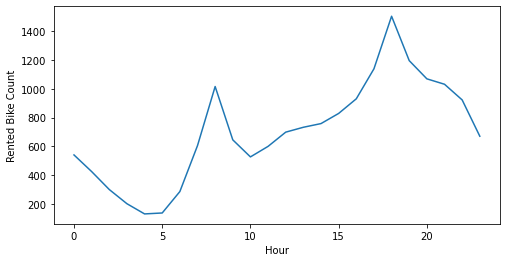

In [21]:
plt.figure(figsize = (8,4))
sns.lineplot(x=hour_avg['Hour'],y=hour_avg['Rented Bike Count'])

#### We have made some utility functions for conversions and repetitions

#### 1. Convert hour into 5 buckets -using utility functions

In [22]:
def convertHourBuckets(hour):
    hour = int(hour)
    if hour < 5:
        return 'early_morning'
    elif hour < 9:
        return 'morning'
    elif hour < 16:
        return 'office_hours'
    elif hour < 20:
        return 'evening'
    else:
        return 'night'

#### 2. Convert a date in the format 12/09/2018 to corresponding day = "Wednesday"

In [23]:

def convertDate2Day(date):
    if datetime.datetime.strptime(date, '%d-%m-%Y'):
        return datetime.datetime.strptime(date, '%d-%m-%Y').strftime('%A')
    elif datetime.datetime.strptime(date, '%d/%m/%Y'):
        return datetime.datetime.strptime(date, '%d/%m/%Y').strftime('%A')
# Convert a date in the format 12/09/2018 to weekday or weekend if weekend returns 1
# did not consider the middle east standard, as the data is from Korea
def convertDate2Weekend(date):
    day = convertDate2Day(date)
    if day in ["Sunday","Saturday"]:
        return 1
    return 0

In [24]:
#Convert the Hours into 5 buckets
bikeData['Hour_bkt'] = bikeData['Hour'].apply(lambda x : convertHourBuckets(x))

In [25]:
#bikeData['Date'] = bikeData['Date'].apply(lambda x : convertDate2Day(x))

In [26]:
#Convert the Hours into 3 buckets
bikeData['Weekend'] = bikeData['Date'].apply(lambda x : convertDate2Weekend(x))

In [27]:
bikeData.Hour_bkt.unique()

array(['early_morning', 'morning', 'office_hours', 'evening', 'night'],
      dtype=object)

## 1.4.2 n-1 dummy encoding

In [28]:
bikeCatData_enc = pd.get_dummies(bikeData[['Seasons','Hour_bkt','Functioning Day','Holiday']],'',drop_first=True)
bikeCatData_enc.rename(columns={'_Yes':'FunctionDay'},inplace=True)
bikeCatData_enc.head(2)

,_Spring,_Summer,_Winter,_evening,_morning,_night,_office_hours,FunctionDay,_No Holiday
0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,1,1


In [29]:
bikeData_num = bikeData.select_dtypes(include=[np.number])
bikeData_num = bikeData_num.drop('Hour',axis = 1)

In [30]:
bikeData_feats = pd.concat([bikeData_num,bikeCatData_enc], axis=1)

In [31]:
bikeData_feats.describe()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Weekend,_Spring,_Summer,_Winter,_evening,_morning,_night,_office_hours,FunctionDay,_No Holiday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.284932,0.252055,0.252055,0.246575,0.166667,0.166667,0.166667,0.291667,0.966324,0.950685
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,0.451408,0.434217,0.434217,0.431042,0.372699,0.372699,0.372699,0.454556,0.180404,0.216537
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
bikeData.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Seasons,Holiday,Functioning Day,Hour_bkt,Weekend
0,01-12-2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,Winter,No Holiday,Yes,early_morning,0
1,01-12-2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,Winter,No Holiday,Yes,early_morning,0
2,01-12-2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,Winter,No Holiday,Yes,early_morning,0
3,01-12-2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,Winter,No Holiday,Yes,early_morning,0
4,01-12-2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,Winter,No Holiday,Yes,early_morning,0


#### 3. Scaling all together

In [33]:
def standardScale_dataframe(data,name_suffix = "_std"):
    std_scale = StandardScaler()
    variables = []
    numeric_df = data.select_dtypes(include=[np.number])
    for param in numeric_df.columns:
        param_name = param.strip()+name_suffix
        variables.append(param_name)
        if param_name not in (numeric_df.columns):
            print(param_name)
            numeric_df[param_name] = std_scale.fit_transform(data[[param]]) # returns z-scores of the values of the attribute
    return numeric_df,variables


#### 4. Model Performance logged into a dataframe for comparison

In [34]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    mape = np.abs((actual - predicted) / actual)
    mape = mape[~np.isnan(mape)]
    return ((mape) * 100).mean()

def model_metrics(result_df,model,name,remarks,datatype,y,y_hat):

    # calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for full model
    # use 'rsquared' to calculate R-squared value
    # use 'rsquared_adj' to calculate Adjusted R-squared value
    # use 'mean_squared_error' to calculate MSE
    # use 'rmse' to calculate RMSE
    # use 'mean_absolute_error' to calculate MAE
    # use the defined function 'mape' to calculate MAPE
    residuals = model.resid

    MLR_full_model_metrics = pd.Series({'Model_Name': name,
                                        'Data_Type': datatype,
                                        'Remarks': remarks,
                                        'R-squared': model.rsquared,
                                        'Adj. R-squared': model.rsquared_adj,
                                        'Durbin_Watson':statsmodels.stats.stattools.durbin_watson(residuals, axis=0),
                                        'JB_Prob':statsmodels.stats.stattools.jarque_bera(residuals, axis=0)[1],
                                        'Condition_No': model.condition_number,
                                        'MSE': mean_squared_error(y, y_hat),
                                        'RMSE': np.sqrt(mean_squared_error(y, y_hat)),
                                        'MAE': mean_absolute_error(y, y_hat),
                                       })

    
    # append the values to the result table
    result_df = result_df[(result_df.Model_Name != name)]
    result_df = result_df.append(MLR_full_model_metrics, ignore_index = True)

    return result_df

#### 5. Utility function which wraps repeatedly used stuff for lr Models

In [35]:
def lr_model_experiment(df,target,exp_name,remarks,result_df,test_size=0.3,random_state = 123):
    X = df
    X = sm.add_constant(X)
    X = X.drop(target,axis = 1)
    print(X.columns)
    Y = df[target]
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=test_size,random_state=random_state) 
    lin_reg_model = sm.OLS(y_train,x_train).fit()
    
    y_test_predict = lin_reg_model.predict(x_test)

    out_df = model_metrics(result_df,lin_reg_model,exp_name+'_Test',remarks,"Test",y_test,y_test_predict)
    
    y_train_predict = lin_reg_model.predict(x_train)

    out_df = model_metrics(out_df,lin_reg_model,exp_name+'_Train',remarks,"Train",y_train,y_train_predict)
    return out_df,lin_reg_model,len(x_train)

<a id="after"></a>
## 1.5 Model Performance after Transformation

Transformation is a process that can be used to change the scale of the original data to get more accurate results. 

The transformed data can be used to satisfy the assumptions of linear regression, which were not satisfied earlier with the original data.

#### First, we build the model using the original data.

In [36]:
# create a copy of our dataframe 'bikeData'
bikeData_cons = bikeData_feats.copy()

#### Split the data into training and test sets.

In [37]:
# set of independent variables
# drop the target variable using 'drop()'
# 'axis = 1' drops the specified column
X = bikeData_cons.drop('Rented Bike Count', axis = 1)

# dependent variable
y = bikeData_cons['Rented Bike Count']

# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

# check the dimensions of the train & test subset
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (7008, 17)
y_train (7008,)
X_test (1752, 17)
y_test (1752,)


**Build the multiple linear regression model using the OLS method.**

In [38]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     586.2
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:54:27   Log-Likelihood:                -52304.
No. Observations:                7008   AIC:                         1.046e+05
Df Residuals:                    6991   BIC:                         1.048e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Check the Assumption of Autocorrelation

We can check the correlation between the residuals using the `Durbin-Watson` test. The value of the test statistic ranges from 0 to 4. The test statistic value near to 2, represents no autocorrelation. The value of the test statistic between 0 and 2 implies positive autocorrelation and the value between 2 and 4 implies negative autocorrelation.



**Interpretation:** From the above summary, we can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 2.038). Thus, we conclude that there is no autocorrelation.

#### Check the Normality of Residuals

Check the normality of residuals before transforming the target variable

Skewness of the residuals:  0.6951071098388454


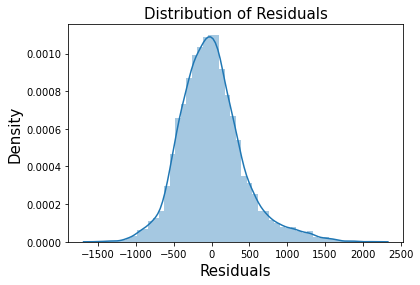

In [39]:
# plot a distplot for the residuals
sns.distplot(MLR_model.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model.resid.skew())

We can see that the distribution of the residuals is positively skewed. Thus, we will apply a log transformation to the target variable.

#### Interpretation of coefficient of skewness
If the value of:<br>
skewness < 0 implies negative skewness<br>
skewness > 0 implies positive skewness<br>
skewness = 0 implies no skewness (perfect normal distribution)<br>

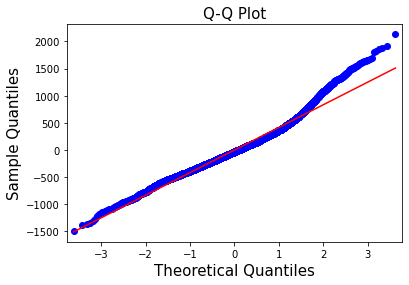

In [40]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation** Here we can see that the residuals are not normally distributed. The value of skewness is 1.3445. We will log transform the target variable and see if this reduces the skewness.

**Build the multiple linear regression model using the OLS method after transforming the target variable.**

<a id="log"></a>
### 1.5.1 Log Transformation

Transform the target and/or independent variables by applying a log on the original data to reduce the skewness. We can not apply log transformation on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:
<p style='text-indent:28em'> <strong> log(y) = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

In [41]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use log transformation of y_train 
MLR_model_after_transform = sm.OLS(np.log(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 Sep 2021   Prob (F-statistic):                nan
Time:                        09:54:27   Log-Likelihood:                    nan
No. Observations:                7008   AIC:                               nan
Df Residuals:                    6991   BIC:                               nan
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Interpretation** The value of R-Squared increases from 0.352 to 0.353 and the value of Adjusted R-Squared increases from 0.315 to 0.317. We don't see much increase in these values but we see that the residuals are more normally distributed. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  nan


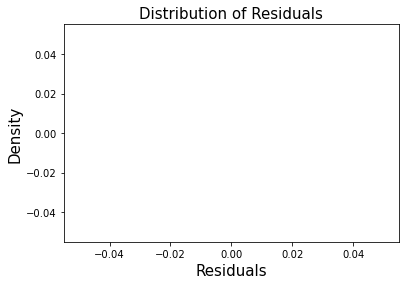

In [42]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

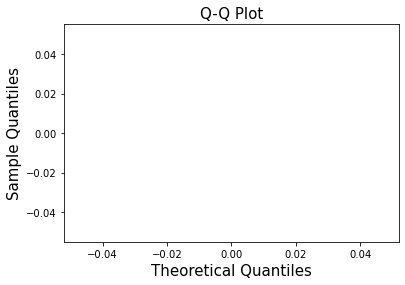

In [43]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

<a id="sqr"></a>
### 1.5.2 Square Root Transformation

This transformation is used to reduce the skewness in the data. We can transform the target and/or independent variables by taking its square root. It can be used on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:28em'> <strong> sqrt(y) = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

Let us apply square root transformation on y_train. 

**Square Root Transformation**

In [44]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use square root transformation of y_train 
MLR_model_after_transform = sm.OLS(np.sqrt(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     831.4
Date:                Fri, 17 Sep 2021   Prob (F-statistic):               0.00
Time:                        09:54:28   Log-Likelihood:                -23888.
No. Observations:                7008   AIC:                         4.781e+04
Df Residuals:                    6991   BIC:                         4.793e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Interpretation** The value of R-Squared increases from 0.573 to 0.656 and the value of Adjusted R-Squared increases from 0.572 to 0.655. We don't see much increase in these values but we see that the residuals are more normally distributed. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  -0.027657984913844705


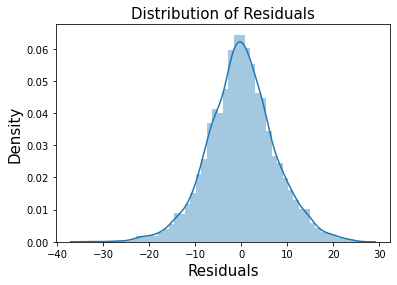

In [45]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

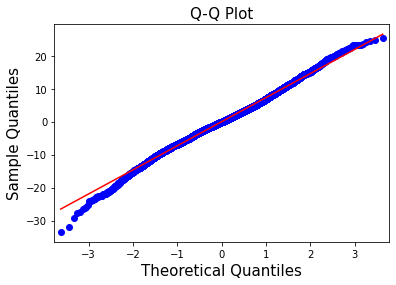

In [46]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

<a id="rec"></a>
### 1.5.3 Reciprocal Transformation

Transform the target and/or independent variables by taking its reciprocal. This transformation changes the distribution of the variable drastically. We can not perform the transformation on the data containing zero values. The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:28em'> <strong> 1/y = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

Let us apply reciprocal transformation on y_train.

**Reciprocal Transformation**

In [47]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use reciprocal transformation of y_train 
MLR_model_after_transform = sm.OLS(1/(y_train), X_train).fit()

# print the summary output
print(MLR_model_after_transform.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 17 Sep 2021   Prob (F-statistic):                nan
Time:                        09:54:28   Log-Likelihood:                    nan
No. Observations:                7008   AIC:                               nan
Df Residuals:                    6991   BIC:                               nan
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Interpretation** The value of R-Squared increases from 0.352 to 0.353 and the value of Adjusted R-Squared increases from 0.315 to 0.317. We don't see much increase in these values but we see that the residuals are more normally distributed. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  nan


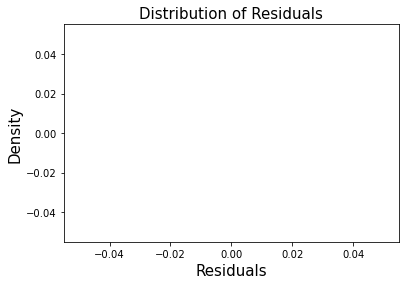

In [48]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

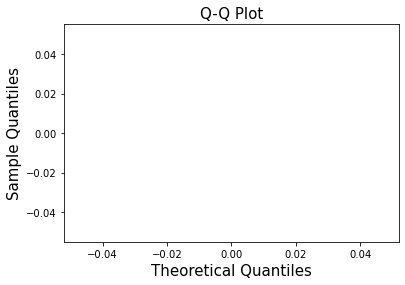

In [49]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

<a id="box"></a>
### 1.5.4 Box-Cox Transformation

It is a generalized version of log transformation.
It makes the variable more symmetrical by reducing its skewness. The transformation is given as:<br>

<p style='text-indent:30em'> <strong> y<sup>'</sup><sub>λ</sub> = (y<sup>λ</sup> -1) / λ   </strong> </p>

λ > 1, reduces the negative skewness in the variable and makes it more symmetrical<br>
λ < 1, reduces the positive skewness in the variable and makes it more symmetrical<br>
λ = 1, shifts the variable to the left by 1

The bivariate regression model after transforming observed values of target variable is given as:

<p style='text-indent:30em'> <strong> y<sup>λ</sup> = β<sub>0</sub> + β<sub>1</sub>x  </strong> </p>

**BoxCox Transformation**

In [50]:
# build a model on training dataset
# fit() is used to fit the OLS model
# use BoxCox transformation of y_train 
#MLR_model_after_transform = sm.OLS(stats.boxcox(y_train), X_train).fit()

# print the summary output
#print(MLR_model_after_transform.summary())

**Interpretation** The value of R-Squared increases from 0.352 to 0.353 and the value of Adjusted R-Squared increases from 0.315 to 0.317. We don't see much increase in these values but we see that the residuals are more normally distributed. 

Check the normality of residuals after transforming the target variable

Skewness of the residuals:  nan


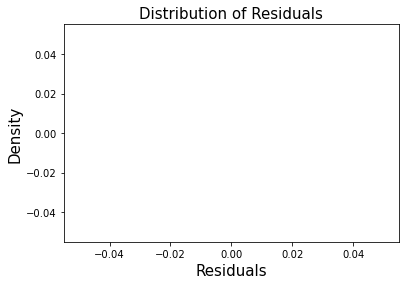

In [51]:
# plot a distplot for the residuals
sns.distplot(MLR_model_after_transform.resid)

# add plot and axis labels
# set text size using 'fontsize'
plt.title('Distribution of Residuals', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

# print the skewness of the residuals
print("Skewness of the residuals: ", MLR_model_after_transform.resid.skew())

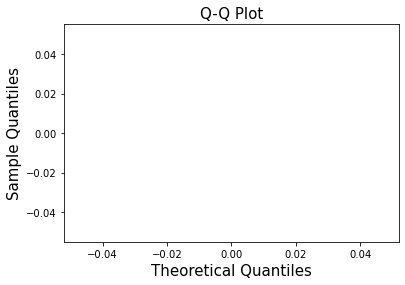

In [52]:
# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_model_after_transform.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

After transforming the target variable, the skewness reduced to 0.0366 and we can see a near normal distribution of the residuals.

### 3. Multiple Linear Regression(MLR)

### 3.1 Understanding the Features Relations

<Figure size 1080x1080 with 0 Axes>

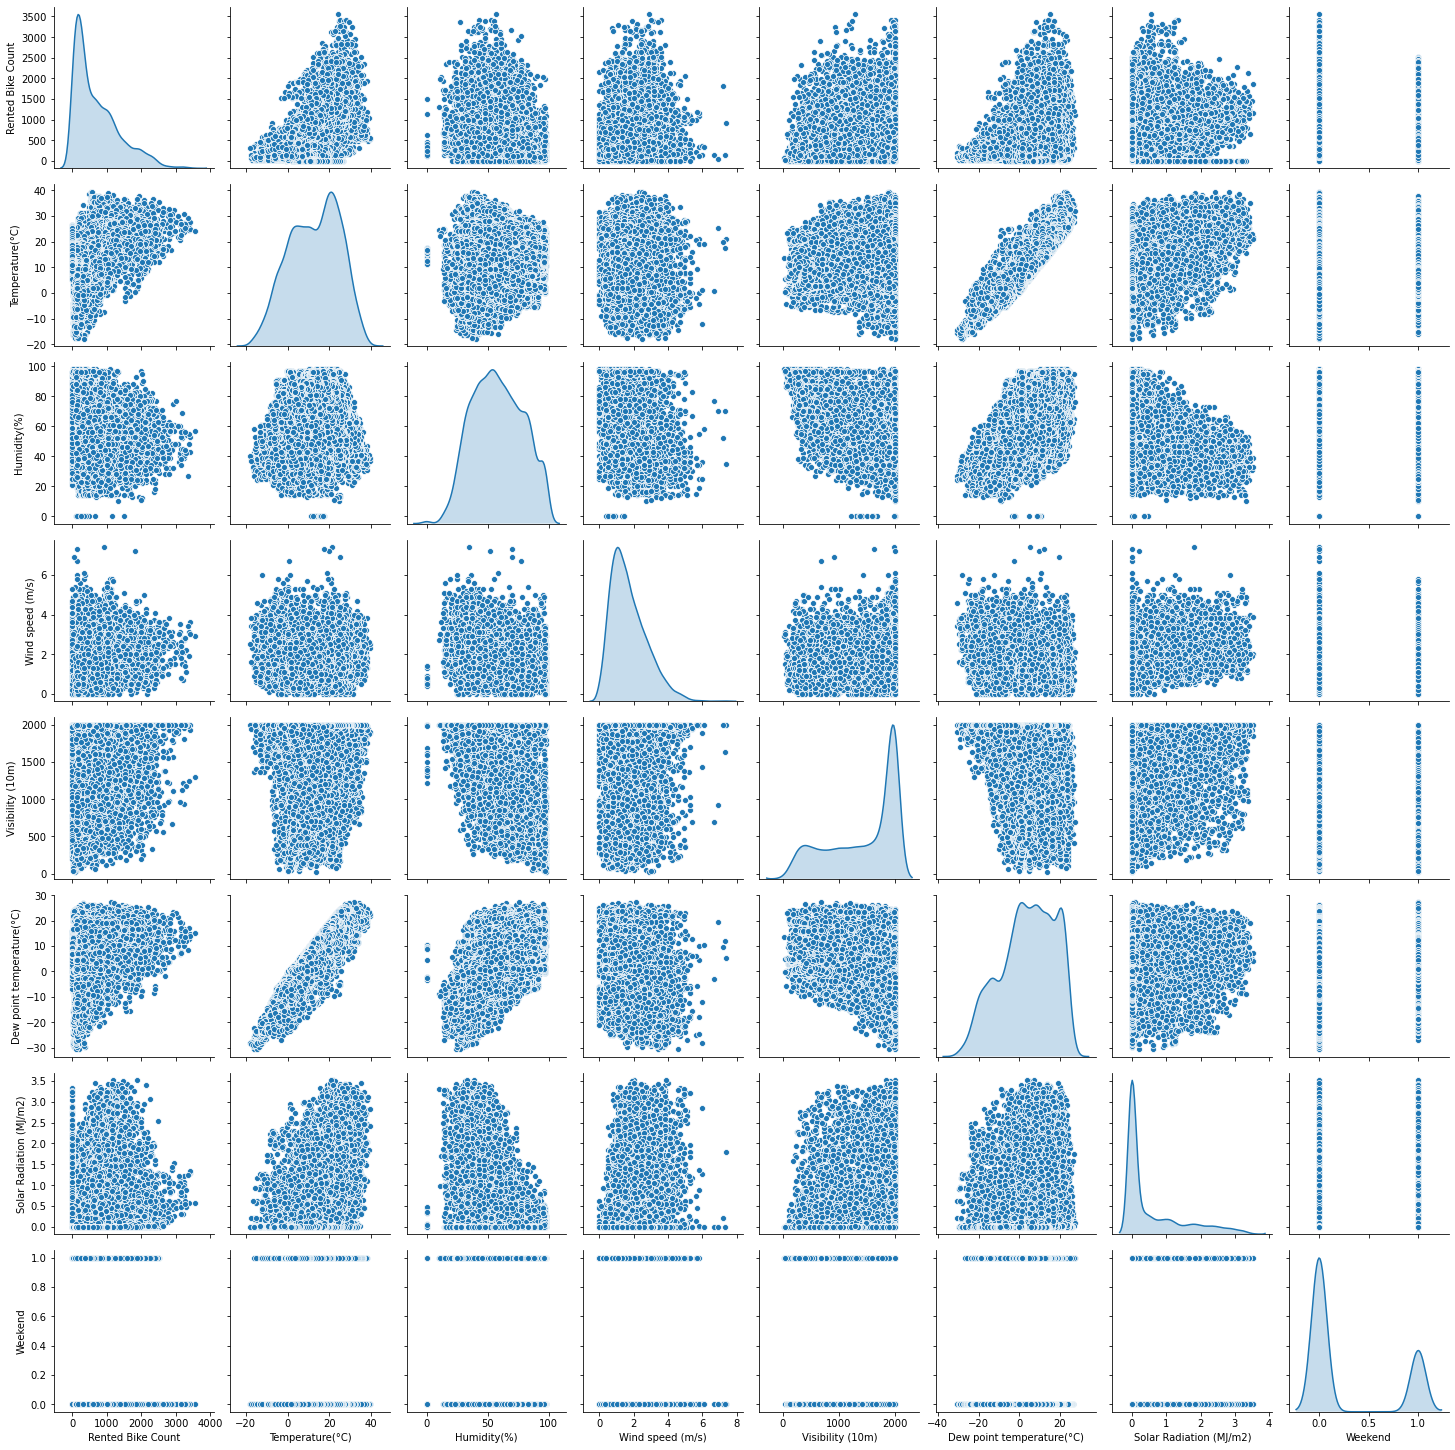

In [53]:
plt.figure(figsize=(15,15))
sns.pairplot(bikeData_num, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")

**Observation1: some linearity is identified between Temperature and Dew point temperature**

In [54]:
corr = bikeData_feats.corr()

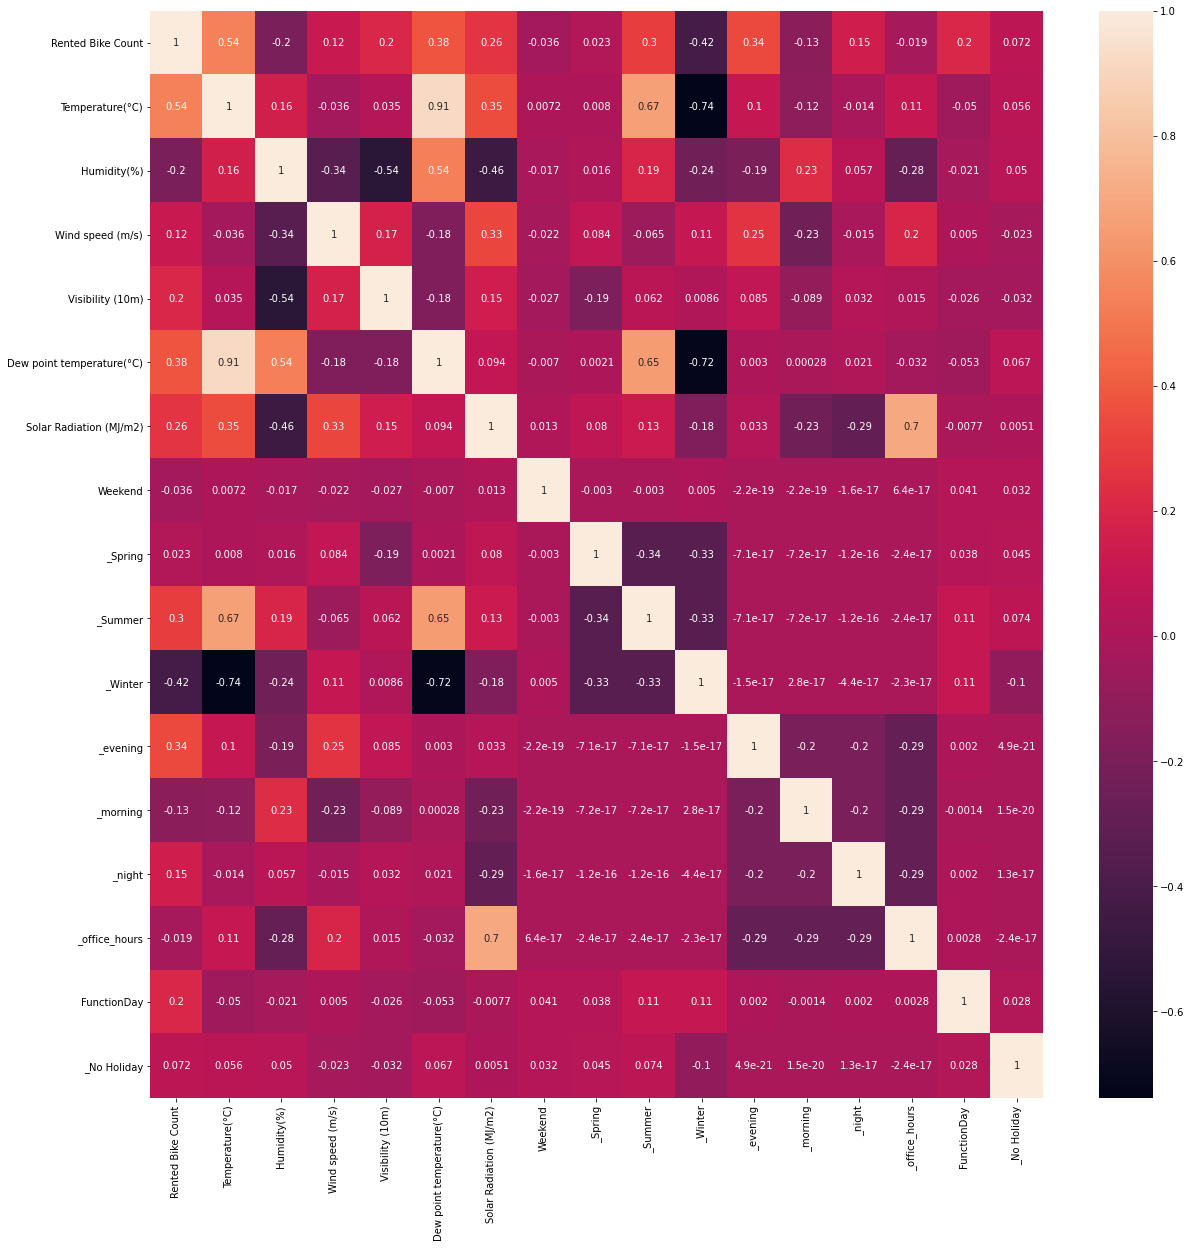

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

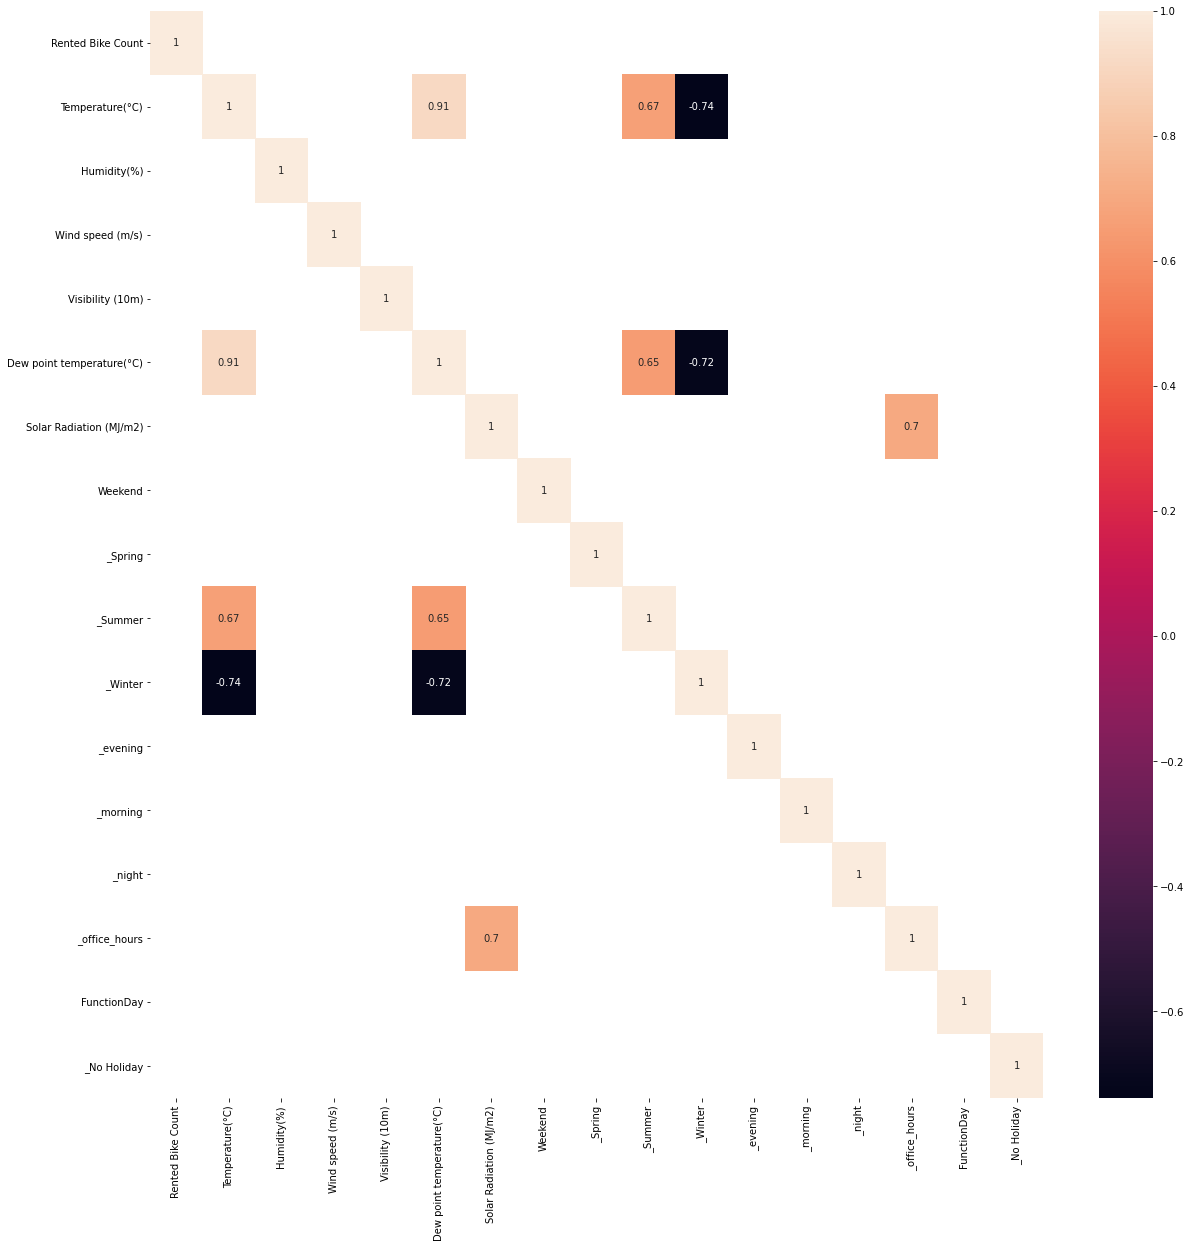

In [56]:
filter_corr = corr[np.abs(corr) > 0.6]
plt.figure(figsize=(20,20))
sns.heatmap(filter_corr, annot=True)

**Observation2: Significant linearity is identified between Temperature with Summer and Winter**

### 3.1.x Feature Elimination

In [57]:
bikeData_feats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(°C)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(°C)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Weekend                    8760 non-null   int64  
 8   _Spring                    8760 non-null   uint8  
 9   _Summer                    8760 non-null   uint8  
 10  _Winter                    8760 non-null   uint8  
 11  _evening                   8760 non-null   uint8  
 12  _morning                   8760 non-null   uint8  
 13  _night                     8760 non-null   uint8

In [58]:
x_columns = ["Temperature(°C)", "Humidity(%)", "Wind speed (m/s)", "Visibility (10m)", "Dew point temperature(°C)", "Solar Radiation (MJ/m2)", "Rainfall(mm)", "Snowfall (cm)", "Weekend", "_Summer", "_Winter", "_morning", "_night", "FunctionDay", "_No Holiday"]
y = bikeData_feats["Rented Bike Count"]

In [59]:
def get_stats():
    x = bikeData_feats[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())

get_stats()

KeyError: "['Snowfall (cm)', 'Rainfall(mm)'] not in index"

#### Interpretation - 
Coefficients having p-values less than alpha are statistically significant. We would generally want to drop variables with a p-value greater than 0.05. As seen from the initial summary above, the least statistically significant variable are “Visibility (10m)” and "_morning" with a p-value of 0.968. Hence, we would want to drop “Safety” as a variable as shown below. The new summary is shown below as well.

In [ ]:
x_columns.remove("Visibility (10m)")
x_columns.remove("_morning")

In [ ]:
get_stats()

#### Interpretation - 
We are left with 13 variables. Since each of the p-values are below 0.05, all of these variables are said to be statistically significant.

In [ ]:
# filter the numerical features in the dataset
bikeData_numeric_features_vif = bikeData_feats.select_dtypes(include=[np.number])

# display the first five observations
bikeData_numeric_features_vif.head()

In [ ]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(bikeData_numeric_features_vif.values, i) for i in range(bikeData_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = bikeData_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

In [ ]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'

# use for loop to iterate the VIF function 
for ind in range(len(bikeData_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(bikeData_numeric_features_vif.values, i) for i in range(bikeData_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = bikeData_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        bikeData_numeric_features_vif = bikeData_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

### 3.2 Model Building

In [ ]:
Model_Features = list(bikeData_feats.columns)
Model_Features

In [ ]:
Target_Variable = ['Rented Bike Count']

**Make a result dataframe**

In [ ]:
#Model Parameters to be compared in each experiments
cols = ['Model_Name','Data_Type','Remarks', 
        'R-squared','Adj. R-squared', 
        'Durbin_Watson', 'JB_Prob', 'Condition_No',
        'MSE', 'RMSE', 'MAE']
# creating a empty dataframe of the colums
result_table_e3_set = pd.DataFrame(columns = cols)

In [ ]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats,Target_Variable,"BIKE_LR_ALL_E31",
                                                              "All variables, no tranformation,\
                                                               no scaling, only categorical encoding",
                                                               result_table_e3_set,0.3,123)


In [ ]:
lr_model.summary()

In [ ]:
result_table_e3_set.tail()

### 3.3 Model Evaluation

#### 3.3.1 Determinant of correlaton Matrix

***Let D be the determinant of correlation matrix. \
Then 0 < D < 1\
D=0 High multicollinearity\
D=1 No multicollinearit***

In [ ]:
bikeData_feats_noTarget = bikeData_feats.drop(Target_Variable,axis=1)
np.linalg.det(bikeData_feats_noTarget.corr())

#### 3.3.2 Condition Number

***CN > 1000 Severe multicollinearity\
100 < CN < 1000 Moderate multicollinearity\
100 < CN No multicollinearity***

In [ ]:
print("Condition Number is very High = ",lr_model.condition_number)

#### Experiment 2

Reduce some features which are shown as linear from the heatmap

In [ ]:
bikeData_feats_e32 = bikeData_feats.drop(['_Summer', '_Winter','Dew point temperature(°C)'],axis=1)

In [ ]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E32",
                                                              "Base = BIKE_LR_ALL_E32,\
                                                               Removed high correlations",
                                                               result_table_e3_set,0.3,123)

In [ ]:
result_table_e3_set.tail()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(bikeData_feats_e32.corr(),annot=True)

#### Experiment 3

Reduce some more  features which are showing linearity near to 5

In [ ]:
bikeData_feats_e33 = bikeData_feats.drop(['_Summer', '_Winter',\
                                          'Dew point temperature(°C)',\
                                          'Humidity(%)','_night'],axis=1)

In [ ]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e32,Target_Variable,"BIKE_LR_ALL_E33",
                                                              "Removed correlation near to |0.5|,\
                                                               base BIKE_LR_ALL_E32",
                                                               result_table_e3_set,0.3,123)

In [ ]:
result_table_e3_set.tail()

***Observation: No Improvement has been observed from Experiment 32***

#### Experiment 4

Lets Scale the Data

In [ ]:
bikeData_feats_e34,var_names = standardScale_dataframe(bikeData_feats)

In [ ]:
bikeData_feats_e34_std = bikeData_feats_e34[var_names]


In [ ]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e34_std,['Rented Bike Count_std'],"BIKE_LR_ALL_E34",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

In [ ]:
result_table_e3_set.tail()

In [ ]:
lr_model.summary()

#### Experiment 5

No Scaling of Target Variable

In [ ]:
bikeData_feats_e35_std = bikeData_feats_e34[var_names]
bikeData_feats_e35_std.drop('Rented Bike Count_std', axis=1, inplace=True)
bikeData_feats_e35_std = pd.concat([bikeData_feats_e35_std,bikeData['Rented Bike Count']],axis=1)

bikeData_feats_e35_std.head(3)

In [ ]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e35_std,
                                                              ['Rented Bike Count'],"BIKE_LR_ALL_E35",
                                                              "input and output variable scaled",
                                                               result_table_e3_set,0.3,123)

In [ ]:
lr_model.summary()

In [ ]:
result_table_e3_set.tail(20)

#### 3.3.2.1 Condition Number

***The Conditions Number has been reduced after the scaling of the data***

In [ ]:
print("Condition Number is now normal after the scale transformations = ",lr_model.condition_number)

#### 3.3.3 Existence of linear relationship

The independent variables must have a linear relationship with the dependent 
variable

In [ ]:
import math

def plot_residual_linearity(residual,predictors,figsize=(10,6)):
    N = len(predictors.columns)
    rows = math.ceil(N/3)
    if rows == 0:
        return
    
    fig, axs = plt.subplots(rows,3, figsize=figsize)
    fig.subplots_adjust(hspace = .2, wspace=.2)

    axs = axs.ravel()
    
    i = 0
    for pred in predictors.columns:
        sns.scatterplot(x = predictors[pred],y=residual,ax=axs[i] )
        i +=1
        

In [ ]:

plot_residual_linearity(lr_model.resid,bikeData_feats_e35_std,figsize=(15, 30))

***Observation: There is no specific pattern observed between predictors and residuals***

A scatter plot depicting no pattern indicates that the variable has a linear relationship with the response variable. 

we see a random pattern in all the plots of independent. Hence, we may say that, the predictors are linearly related with the response variable

Relation is seen only with the target variable as it was present in the input dataframe.

#### 3.3.4 Assumption of autocorrelation


Assumption of autocorrelation is violated when residuals are correlated within 
themselves, i.e. they are serially correlated

To test whether the error terms are autocorrelated,we do Durbin-Watson test

In [ ]:
statsmodels.stats.stattools.durbin_watson(lr_model.resid, axis=0)

If the value is near to 2, then there is No autocorrelation

#### 3.3.5 Homoscedasticity assumption

In [ ]:
lm,lmpval,fval,f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr_model.resid,lr_model.model.exog)
print(lmpval)

There are two big reasons why we need homoscedasticity: While heteroscedasticity does not cause bias in the coefficient estimates, it does make them less precise. ... This effect occurs because heteroscedasticity increases the variance of the coefficient estimates but the OLS procedure does not detect this increase.

***Observation: As per the test, the error terms are heteroskedastic***

#### Experiment 6

Trying to redude heteroskedasticity by removing RainFall and Snow Fall from the model, as the above scatter plot have shown a funnel like pattern.

In [ ]:
bikeData.columns

In [ ]:
bikeData_feats_e36_std = bikeData_feats_e35_std[['Temperature(°C)_std', 'Humidity(%)_std', 'Wind speed (m/s)_std',
       'Visibility (10m)_std', 
       'Solar Radiation (MJ/m2)_std', 
       'Weekend_std', '_Spring_std', 
       '_morning_std', '_night_std', 'FunctionDay_std', '_No Holiday_std',
       'Rented Bike Count']]
sns.pairplot(bikeData_feats_e36_std)

In [ ]:
# Fit the Model and store the results
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e36_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_RED_E36",
                                                              "input and output variable scaled\
                                                               reduced few variables",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()

In [ ]:
lm,lmpval,fval,f_pval = statsmodels.stats.diagnostic.het_breuschpagan(lr_model.resid,lr_model.model.exog)
print(lmpval)

***Observation: Experiment did not improve the hetroskedasticity, and also the model performance have been reduced. So lets leave it here.***

#### 3.3.6 The error terms must follow normal distribution


In [ ]:
residuals = lr_model.resid
sns.distplot(residuals,kde=True)

In [ ]:
JB,JBpv,skew,kurt =sm.stats.stattools.jarque_bera(residuals,axis=0)
JBpv

##### Experiment 7

In [ ]:

bikeData_feats_e37_std = bikeData_feats_e35_std.copy()
bikeData_feats_e37_std = bikeData_feats_e37_std.drop('Rented Bike Count', axis=1)
for i in range(len(bikeData_feats_e37_std.columns)):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(bikeData_feats_e37_std.values,i) for i in range(bikeData_feats_e37_std.shape[1])]
    vif['Features'] = bikeData_feats_e37_std.columns
    vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)
    
    multi = vif[vif.VIF_Factor > 10]
    
    if (multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor',ascending = False)
        bikeData_feats_e37_std = bikeData_feats_e37_std.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)
        break;


In [ ]:
X = bikeData_feats_e37_std
X = sm.add_constant(X)
Y = bikeData['Rented Bike Count']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 123) 
lin_reg_model = sm.OLS(y_train,x_train).fit()
lin_reg_model.summary()

In [ ]:
# Fit the Model and store the results
bikeData_feats_e37_std = pd.concat([bikeData_feats_e37_std,bikeData['Rented Bike Count']],axis=1)
result_table_e3_set,lr_model,num_train  = lr_model_experiment(bikeData_feats_e37_std,
                                                              ['Rented Bike Count'],"BIKE_LR_STD_VIF_E37",
                                                              "after VIF treatment",
                                                               result_table_e3_set,0.3,123)

result_table_e3_set.tail()